 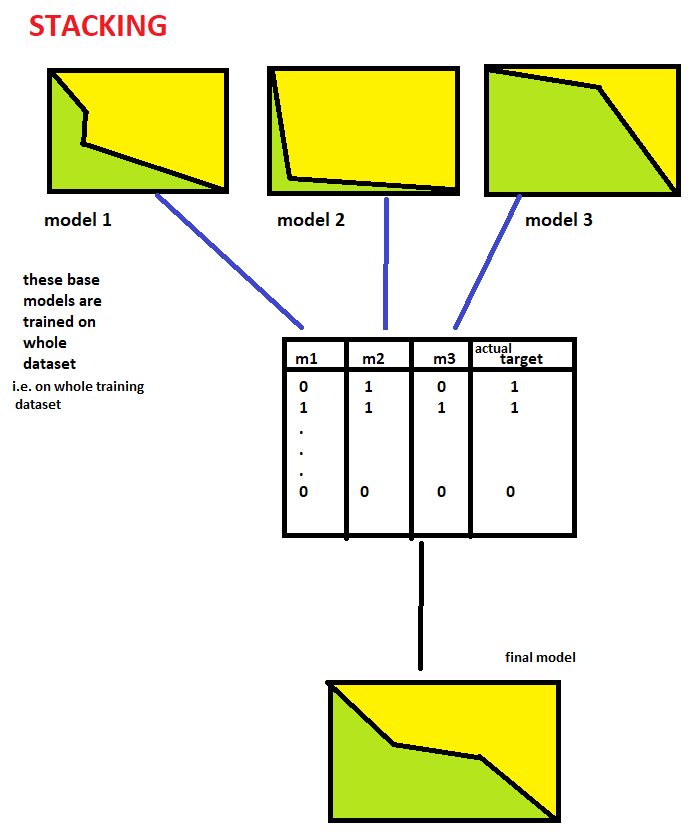   

# Importing

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# get data

In [2]:
X, y = load_iris(return_X_y=True)

# split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# create different models to be used in stacking

In [3]:
seed = 1
models = [('rf',RandomForestClassifier(n_estimators=10,random_state=seed)),('svc',LinearSVC(random_state=seed))]

# create stack model and fit

In [6]:
stack_model = StackingClassifier(estimators=models,final_estimator=LogisticRegression())
stack_model.fit(X_train,y_train)

C:\Users\Shrikar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Shrikar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Shrikar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Shrikar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Shrikar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1)),
                               ('svc', LinearSVC(random_state=1))],
                   final_estimator=LogisticRegression())

# predictions

In [7]:
y_pred = stack_model.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


# Metrics

In [8]:
print("Stacking Classifier")
acc_score = metrics.accuracy_score(y_test,y_pred)
conf_mat = metrics.confusion_matrix(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(acc_score,"\n",conf_mat,"\n",f1_score)

Stacking Classifier
0.9777777777777777 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]] 
 [1.         0.97142857 0.96296296]


# From NET

https://www.mygreatlearning.com/blog/ensemble-learning/

## importing

In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.datasets import load_wine,load_iris
from matplotlib.pyplot import figure

## form functions

In [11]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['LogisticRegression'] = LogisticRegression()
  models['KNeighborsClassifier'] = KNeighborsClassifier()
  models['Decision tree'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['GaussianNB'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  scores1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores,scores1

## get data (there are 2)

In [12]:
X,y = load_wine().data,load_wine().target
X1,y1= load_iris().data,load_iris().target

## get models

In [13]:
models = get_models()

## fit and predict

In [14]:
# evaluate the models and store results
results, names, results1 = list(), list(),list()
for name, model in models.items():
  scores,scores1= evaluate_model(model)
  results.append(scores)
  results1.append(scores1)
  names.append(name)
  print('>%s -> %.3f (%.3f)---Wine dataset' % (name, mean(scores), std(scores)))
  print('>%s -> %.3f (%.3f)---Iris dataset' % (name, mean(scores1), std(scores1)))

>LogisticRegression -> 0.950 (0.055)---Wine dataset
>LogisticRegression -> 0.964 (0.041)---Iris dataset
>KNeighborsClassifier -> 0.710 (0.094)---Wine dataset
>KNeighborsClassifier -> 0.964 (0.037)---Iris dataset
>Decision tree -> 0.899 (0.080)---Wine dataset
>Decision tree -> 0.947 (0.056)---Iris dataset
>svm -> 0.687 (0.096)---Wine dataset
>svm -> 0.964 (0.045)---Iris dataset
>GaussianNB -> 0.978 (0.037)---Wine dataset
>GaussianNB -> 0.956 (0.047)---Iris dataset
>stacking -> 0.961 (0.044)---Wine dataset
>stacking -> 0.964 (0.037)---Iris dataset


## vizualize

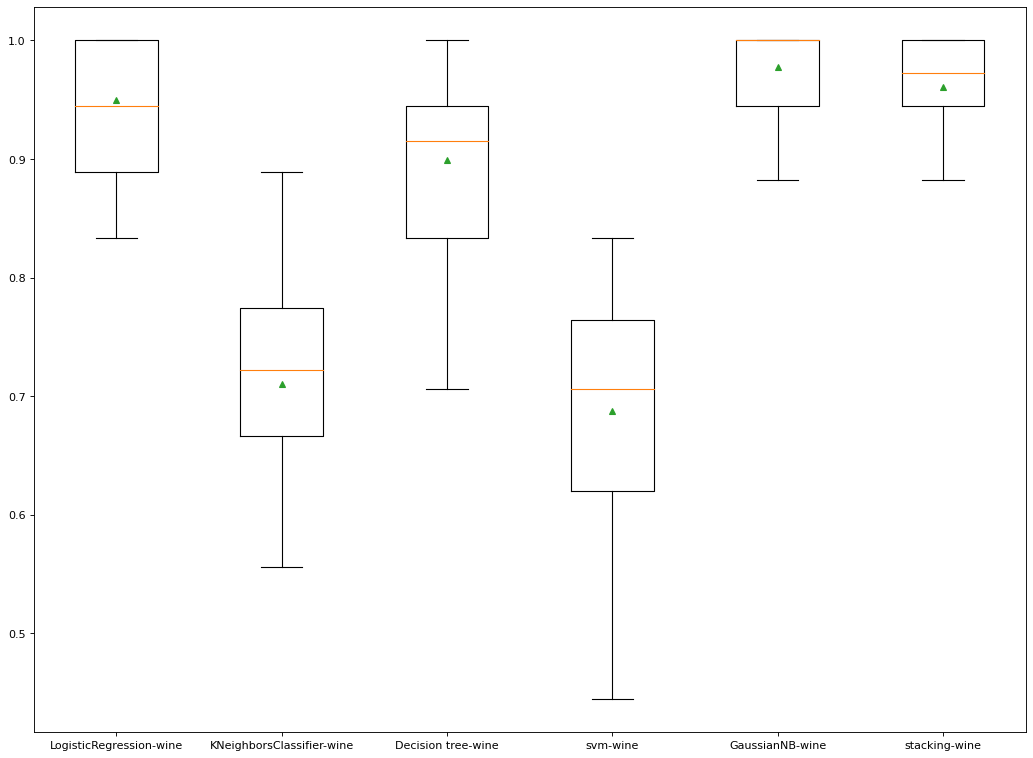

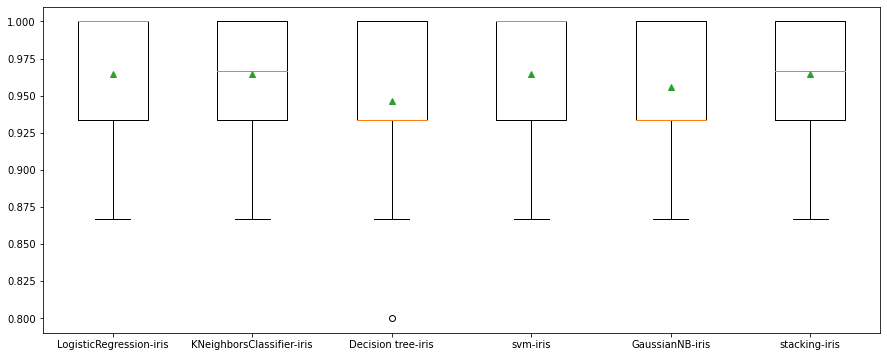

In [15]:
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, labels=[s+"-wine" for s in names], showmeans=True)
pyplot.show()
pyplot.boxplot(results1, labels=[s+"-iris" for s in names], showmeans=True)
pyplot.show()